In [11]:
!pip install graphviz



In [2]:
!git clone https://github.com/karpathy/micrograd.git


Cloning into 'micrograd'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 98 (delta 39), reused 38 (delta 38), pack-reused 39
Receiving objects: 100% (98/98), 239.54 KiB | 39.92 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline



In [27]:
def f(x):
    return 3*x**2 - 4*x + 5




In [28]:
f(3.0)



20.0

In [29]:
xs = np.arange(-5.0,5.0,0.25)
ys = f(xs)




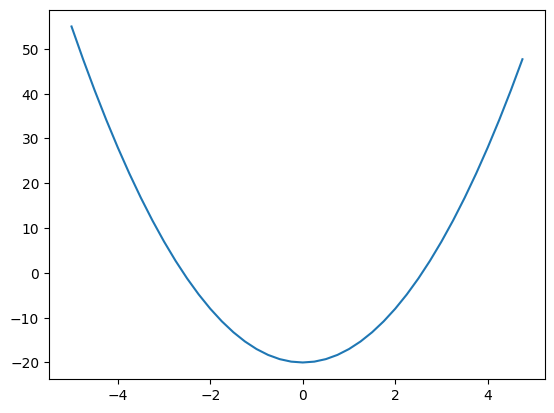

In [25]:
plt.plot(xs,ys)



In [31]:
# deriviative 

h = 0.00000001
x = 2/3
df_dx = (f(x+h)-f(x))/h
df_dx








0.0

In [34]:
# less get more complex
a = 2.0
b = -3.0
c = 10.0

d = a*b+c
d




4.0

In [42]:
h = 0.000001 

#input 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a+= h
d2 = a*b + c 
df = (d2-d1)/h
print('d1', d1)
print('d2', d2)
print('slope', df)






d1 4.0
d2 3.9999969999999996
slope -3.000000000419334


In [15]:
class Values:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op


    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Values(self.data + other.data, (self,other), '+')

    def __sub__(self,other):
        return Values(self.data - other.data, (self,other), '-')
        
    def __mul__(self,other):
        return Values(self.data*other.data, (self,other), '*')




        




    

In [27]:
!pip install graphviz

from graphviz import Digraph
def trace(root):
    #build a set of all nodes and edges in graph 
    nodes, edges = set(),  set()
    def build(v):
        if v not in nodes: 
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr=={'rankdir'='LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any values in graph, create a rectangular ({'record'}) node for it 
        dot.node(name = uid, label= "{ data %.4f }" % (n.data), shape='record')
        if n._op: 
            # if this values is a result od some operation, create an op node for it.
            dot.node(name=uid + n._op, label=n._op)
            # and conncet this node to it
    for n1,n2 in edges:
        #connect n1 and n2 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)), + n2._op)

    return dot 
    
    

    
    
    

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (1067373505.py, line 16)

In [28]:
draw_dot(d)







ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
a = Values(2.0)
b = Values(3.0)
c = Values(-10.0)
d = a-b

d._op



